<center>

### COSC2753 - Machine Learning

# **Exploratory Data Analysis (EDA)**

<center>────────────────────────────</center>
&nbsp;


# I. Introduction

**Exploratory Data Analysis (EDA)** is a fundamental initial step in any data analysis project. It involves a series of techniques to investigate and describe the key characteristics of a dataset. EDA leverages various visualization methods to uncover patterns, trends, and relationships between the data's variables.

In this notebook, we will conduct a thorough EDA on our dataset. This process will enhance our understanding of the data and prepare it for subsequent machine learning tasks. To be more specific, we will perform the following steps:

- **Data Loading:** We will begin by importing the dataset we intend to analyze.

- **Data Understanding:** This stage focuses on gaining familiarity with the data. We will explore the structure, identify the variables, and examine their data types.

- **Data Cleaning:** Here, we will address any inconsistencies, missing values, or errors present within the data.

- **Univariate Analysis:** We will delve deeper into each individual variable, analyzing its distribution and statistical properties.

- **Data Assessment:** Finally, we will comprehensively evaluate the data quality and identify any potential issues that might affect our machine learning model.

By the end of this notebook, we will have a better understanding of the dataset and be ready to move on to the next step in the machine learning process.


# II. Exploratory Data Analysis

## 1. Initial Setup

In [1]:
# Import necessary packages
import pandas as pd  # Data manipulation
import tabulate  # Pretty printing
import sys  # System specific parameters and functions
import importlib  # Importing modules
import os  # OS operations

# Reload modules
sys.path.append("../../")  # Root directory
modules_to_reload = ["scripts.leon", "scripts.styler"]

# Reload modules if they have been modified
missing_modules = []

for module_name in modules_to_reload:
    if module_name in sys.modules:
        importlib.reload(sys.modules[module_name])
    else:
        missing_modules.append(module_name)

# Recache missing modules
if missing_modules:
    print(f"Modules {missing_modules} not found. \nRecaching...")

# Import user-defined scripts
from scripts.leon import Leon  # Leon class
from scripts.styler import Styler  # Styler class

# Configuration
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)
pd.set_option("display.precision", 3)

# Initialize objects
leon = Leon()
styler = Styler()

Modules ['scripts.leon', 'scripts.styler'] not found. 
Recaching...

        @|\@@
       -  @@@@                                                            LEON 1.0.0
      /7   @@@@                                         This is Leon, the friendly lion. He is here to help you
     /    @@@@@@                                     Leon is tailored to manipulate images, data and visualizations
     \-' @@@@@@@@`-_______________                                      Made by: Team X
      -@@@@@@@@@             /    \                                     Version: 1.0.3
 _______/    /_       ______/      |__________-
/,__________/  `-.___/,_____________----------_)



## 2. Global Properties

In [3]:
# # Define the path to the zip file
# zip_data_path = "../../data/raw/Furniture_Data.zip"

# # Unzip data: Only run this once to extract the data. If the data is already extracted, ignore this line.
# df = leon.read_zip(zip_data_path)

In [4]:
# Define the base directory path
base_dir = "../../data/raw/Furniture_Data/Furniture_Data/"

# Construct the complete directory path
data_dir = os.path.abspath(os.path.join(os.getcwd(), base_dir))

# List all directories in the current directory
folders = [
    folder
    for folder in os.listdir(data_dir)
    if os.path.isdir(os.path.join(data_dir, folder))
]

# Populate the image_dir dictionary with folder names and paths
image_dir = {}
for folder in folders:
    folder_path = os.path.abspath(
        os.path.join(data_dir, folder)
    )  # Get the absolute path of the folder
    image_dir[folder] = folder_path

# Print the dictionary
styler.boxify("Image directories")
for folder, path in image_dir.items():
    print(f"{folder}: {path}")

# Define the path to the beds directory
beds_dir = os.path.join(data_dir, "beds")

# Get all folders in the beds directory
style_folders = [
    folder
    for folder in os.listdir(beds_dir)
    if os.path.isdir(os.path.join(beds_dir, folder))
]

print()

# Print the list of style folders
styler.boxify("All Styles")
print(style_folders)
print()

╭───────────────────╮
│ Image directories │
╰───────────────────╯
beds: c:\Users\huuqu\Academic\RMIT\Machine Learning\Group Assignment\data\raw\Furniture_Data\Furniture_Data\beds
chairs: c:\Users\huuqu\Academic\RMIT\Machine Learning\Group Assignment\data\raw\Furniture_Data\Furniture_Data\chairs
dressers: c:\Users\huuqu\Academic\RMIT\Machine Learning\Group Assignment\data\raw\Furniture_Data\Furniture_Data\dressers
lamps: c:\Users\huuqu\Academic\RMIT\Machine Learning\Group Assignment\data\raw\Furniture_Data\Furniture_Data\lamps
sofas: c:\Users\huuqu\Academic\RMIT\Machine Learning\Group Assignment\data\raw\Furniture_Data\Furniture_Data\sofas
tables: c:\Users\huuqu\Academic\RMIT\Machine Learning\Group Assignment\data\raw\Furniture_Data\Furniture_Data\tables

╭────────────╮
│ All Styles │
╰────────────╯
['Asian', 'Beach', 'Contemporary', 'Craftsman', 'Eclectic', 'Farmhouse', 'Industrial', 'Mediterranean', 'Midcentury', 'Modern', 'Rustic', 'Scandinavian', 'Southwestern', 'Traditional', 'Tran

## 2. Data Overview

In [5]:
total_image_count = 0
for folder_path in image_dir.values():
    style_folders = [
        sub_folder
        for sub_folder in os.listdir(folder_path)
        if os.path.isdir(os.path.join(folder_path, sub_folder))
    ]
    for style_folder in style_folders:
        style_folder_path = os.path.join(folder_path, style_folder)
        image_count = len(os.listdir(style_folder_path))
        total_image_count += image_count

# Define keys and values
keys = ["Attribute", "Value"]
values = [
    ["Number of Categories", len(image_dir)],
    ["Number of Images", total_image_count],
]

# Print the table
styler.boxify("Dataset Summary")
print(tabulate.tabulate(values, keys, tablefmt="rounded_grid"))

╭─────────────────╮
│ Dataset Summary │
╰─────────────────╯
╭──────────────────────┬─────────╮
│ Attribute            │   Value │
├──────────────────────┼─────────┤
│ Number of Categories │       6 │
├──────────────────────┼─────────┤
│ Number of Images     │   81935 │
╰──────────────────────┴─────────╯


In [6]:
# Data summary for each dataset

def create_table(image_dir):
    # Create a list to store the tables
    tables = []

    # Iterate over the image directories
    for _, folder_path in image_dir.items():
        total_image_count = 0
        style_info = {}

        # Get all subfolders in the directory
        style_folders = (
            sub_folder
            for sub_folder in os.listdir(folder_path)
            if os.path.isdir(os.path.join(folder_path, sub_folder))
        )

        # Iterate over the style folders
        for style_folder in style_folders:
            style_folder_path = os.path.join(folder_path, style_folder)
            image_count = len(os.listdir(style_folder_path))
            total_image_count += image_count
            style_info[style_folder] = image_count

        # Create a table
        table_data = [
            ["Attribute", "Value"],
            ["Total Number of Images", total_image_count],
        ]

        # Add style information to the table
        table_data.extend(style_info.items())
        tables.append(tabulate.tabulate(table_data, tablefmt="rounded_grid"))

    return tables


# Print the data summary for each dataset
for dataset, directory in image_dir.items():
    # Create tables
    tables = create_table({dataset: directory})

    # Print the dataset summary
    styler.boxify(f"Dataset Summary: {dataset}")

    for table in tables:
        print(table)
        print()

╭───────────────────────╮
│ Dataset Summary: beds │
╰───────────────────────╯
╭────────────────────────┬───────╮
│ Attribute              │ Value │
├────────────────────────┼───────┤
│ Total Number of Images │ 6567  │
├────────────────────────┼───────┤
│ Asian                  │ 48    │
├────────────────────────┼───────┤
│ Beach                  │ 51    │
├────────────────────────┼───────┤
│ Contemporary           │ 1952  │
├────────────────────────┼───────┤
│ Craftsman              │ 186   │
├────────────────────────┼───────┤
│ Eclectic               │ 22    │
├────────────────────────┼───────┤
│ Farmhouse              │ 90    │
├────────────────────────┼───────┤
│ Industrial             │ 61    │
├────────────────────────┼───────┤
│ Mediterranean          │ 75    │
├────────────────────────┼───────┤
│ Midcentury             │ 130   │
├────────────────────────┼───────┤
│ Modern                 │ 380   │
├────────────────────────┼───────┤
│ Rustic                 │ 238   │
├───────────

╭──────╮
│ beds │
╰──────╯


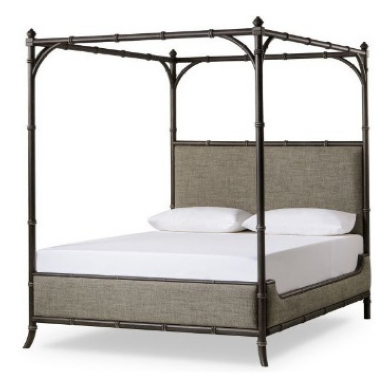

╭────────╮
│ chairs │
╰────────╯


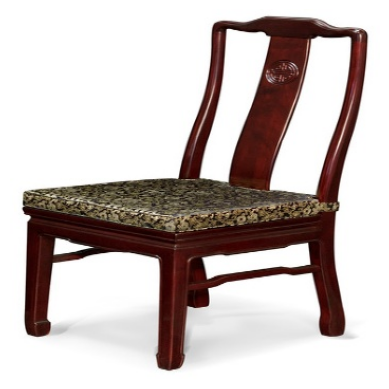

╭──────────╮
│ dressers │
╰──────────╯


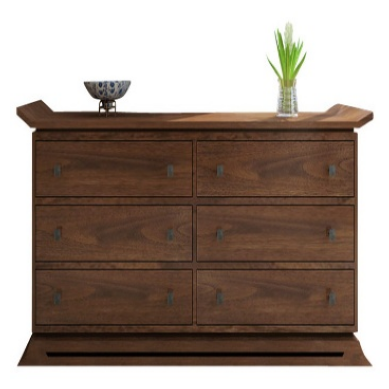

╭───────╮
│ lamps │
╰───────╯


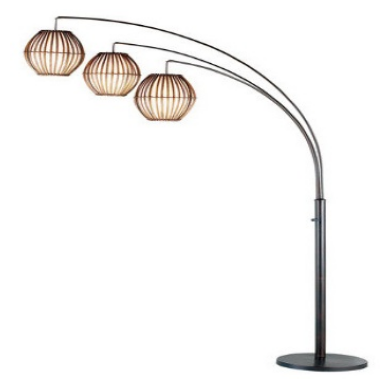

╭───────╮
│ sofas │
╰───────╯


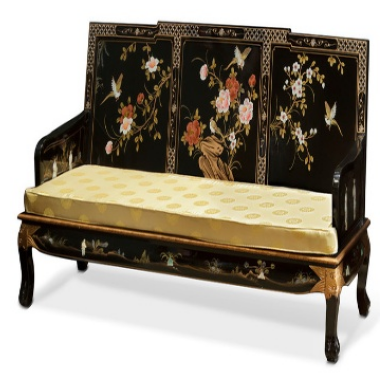

╭────────╮
│ tables │
╰────────╯


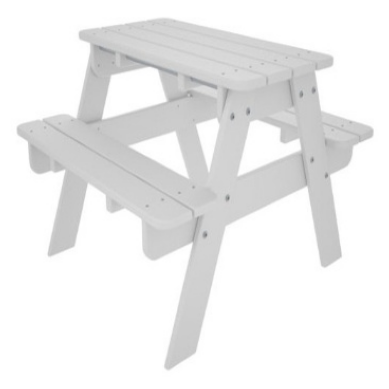

In [7]:
# Print the first 5 images
count = 0
for i in style_folders:
    for category, folder_path in image_dir.items():
        if count == 6:
            break
        style_folder_path = os.path.join(folder_path, i)

        # Print images key
        styler.boxify(f"{category}")

        images = leon.read_images(path=style_folder_path, limit=1)

        count += 1

### Initial Data Exploration

This initial exploration provides a high-level summary of the dataset characteristics. Here are the key findings:

- The dataset comprises over `90,000` images.
- Each image is linked to a specific style, with a total of `six` unique styles represented within the dataset.

### Subsequent Analysis

We will now proceed with a more in-depth examination of the dataset. This will involve identifying and resolving any **inconsistencies** or **duplicate entries** within the data. Additionally, we will conduct a univariate analysis to gain a clearer understanding of the data distribution and individual attributes. 

&rArr; This process will help us uncover any potential issues that might influence the performance of our machine learning model.

In [8]:
# for i in styles_array:
for category, folder_path in image_dir.items():
    # Print images key
    for i in style_folders:
        style_folder_path = os.path.join(folder_path, i)

        # Print images key
        styler.boxify(f"{category}: {i}")

        leon.detect_duplicates(
            path=style_folder_path, limit=-1, hash_type="phash", is_delete=True
        )

╭─────────────╮
│ beds: Asian │
╰─────────────╯
>>> Number of images compared: 48

>>> No duplicate images found.

╭─────────────╮
│ beds: Beach │
╰─────────────╯
>>> Number of images compared: 51

>>> No duplicate images found.

╭────────────────────╮
│ beds: Contemporary │
╰────────────────────╯
>>> Number of images compared: 1952

>>> No duplicate images found.

╭─────────────────╮
│ beds: Craftsman │
╰─────────────────╯
>>> Number of images compared: 186

>>> No duplicate images found.

╭────────────────╮
│ beds: Eclectic │
╰────────────────╯
>>> Number of images compared: 22

>>> No duplicate images found.

╭─────────────────╮
│ beds: Farmhouse │
╰─────────────────╯
>>> Number of images compared: 90

>>> No duplicate images found.

╭──────────────────╮
│ beds: Industrial │
╰──────────────────╯
>>> Number of images compared: 61

>>> No duplicate images found.

╭─────────────────────╮
│ beds: Mediterranean │
╰─────────────────────╯
>>> Number of images compared: 75

>>> No duplicate